# CP462 Group 15 Student Performance factors
<br>**Member:**
1. นาย ปัณณวิชญ์ โพธิ์พันธ์ 65102010198
2. นาย พรพิพัฒน์ แก้วธานี 65102010199
3. นาย ชาติชาย สืบสกุลคริสต์ 65102010412

**Dataset:** StudentPerformanceFactors.csv<br>
**Source:** https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StudentPerformanceFactors.csv')


# DATA INFO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Model mockup

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,category
Access_to_Resources,category
Extracurricular_Activities,category
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,category
Internet_Access,category
Tutoring_Sessions,int64


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


#  Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, LearningCurveDisplay, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Functions

In [ ]:
# creat table for missing data
def missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    return missing_data

# plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1,1.0,5)):
    fig, ax = plt.subplots()
    params = {
        "X": x,
        "y": y,
        "train_sizes": train_sizes,
        "cv": cv,
        "score_type": "both",
        "n_jobs": n_jobs,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "Score"
    }
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    LearningCurveDisplay.from_estimator(estimator, **params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles, ["Training Score", "Test Score"])
    plt.show()

# feature engineering

In [ ]:
# define categorical variables
object_features = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Extracurricular_Activities",
    "Motivation_Level",
    "Internet_Access",
    "Family_Income",
    "Teacher_Quality",
    "School_Type",
    "Peer_Influence",
    "Learning_Disabilities",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Gender"
]
for col in object_features:
    df[col] = pd.Categorical(df[col])
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,category
Access_to_Resources,category
Extracurricular_Activities,category
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,category
Internet_Access,category
Tutoring_Sessions,int64


In [ ]:
# one - hotencoding
ordinal_data = ["Parental_Involvement", "Access_to_Resources", "Distance_from_Home", "Parental_Education_Level", "Peer_Influence", "Teacher_Quality", "Family_Income", "Motivation_Level"]
ordinal_df = df[ordinal_data]
df = pd.get_dummies(df.drop(*[ordinal_data], axis=1), drop_first=True)
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,7,73,0,3,67,False,True,True,False,True
1,19,64,8,59,2,4,61,False,True,True,False,False
2,24,98,7,91,2,4,74,True,True,True,False,True
3,29,89,8,98,1,4,71,True,True,True,False,True
4,19,92,6,65,3,4,70,True,True,True,False,False


แยกข้อมูลแบบลำดับ (ordinal data) และแปลงข้อมูลแบบหมวดหมู่ (categorical data) ที่เหลือโดยใช้เทคนิค One-hot encoding

In [ ]:
# ordinal encoding
for col in ordinal_data:
    if ordinal_df[col].str.contains("Low").any():
        levels = {"Low": 0, "Medium": 1, "High": 2}
    elif ordinal_df[col].str.contains("Negative").any():
        levels = {"Negative": -1, "Neutral": 0, "Positive": 1}
    elif ordinal_df[col].str.contains("Near").any():
        levels = {"Near": 0, "Moderate": 1, "Far": 2}
    else:
        levels = {"High School": 0, "College": 1, "Postgraduate": 2}

    ordinal_df[col] = ordinal_df[col].map(levels)

ordinal_df.head()

<ipython-input-51-0d5cf9696e13>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-0d5cf9696e13>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-0d5cf9696e13>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-0d5c

,Parental_Involvement,Access_to_Resources,Distance_from_Home,Parental_Education_Level,Peer_Influence,Teacher_Quality,Family_Income,Motivation_Level
0,0,2,0,0,1,1,0,0
1,0,1,1,1,-1,1,1,0
2,1,1,0,2,0,1,1,1
3,0,1,1,0,-1,1,1,1
4,1,1,0,1,0,2,1,1


In [ ]:
df = pd.concat([df, ordinal_df], axis=1)
df.astype(int)
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male,Parental_Involvement,Access_to_Resources,Distance_from_Home,Parental_Education_Level,Peer_Influence,Teacher_Quality,Family_Income,Motivation_Level
0,23,84,7,73,0,3,67,False,True,True,False,True,0,2,0,0,1,1,0,0
1,19,64,8,59,2,4,61,False,True,True,False,False,0,1,1,1,-1,1,1,0
2,24,98,7,91,2,4,74,True,True,True,False,True,1,1,0,2,0,1,1,1
3,29,89,8,98,1,4,71,True,True,True,False,True,0,1,1,0,-1,1,1,1
4,19,92,6,65,3,4,70,True,True,True,False,False,1,1,0,1,0,2,1,1


In [ ]:
X = df.drop("Exam_Score", axis=1)
y = df[["Exam_Score"]]
df = pd.concat([X, y], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

เหตุผลที่ต้องใช้ drop("Exam_Score", axis=1) ในโค้ดส่วน X = df.drop("Exam_Score", axis=1) ก็เพราะว่า เราต้องการแยก features หรือตัวแปรอิสระ (X) ออกจากตัวแปรเป้าหมาย (y) ที่เราต้องการทำนาย

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
scores = cross_val_score(lm, x_train, y_train, cv=10)
print(f"CV accuracy: {np.mean(scores)} +/- {np.std(scores)}")

CV accuracy: 0.706246369596091 +/- 0.1206421542400922


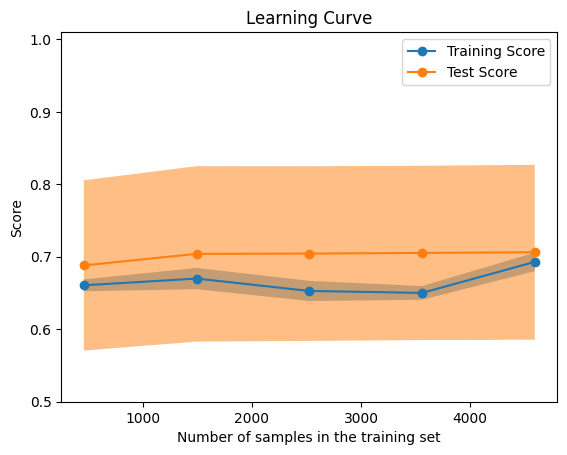

In [ ]:
# assess model performance
title = "Learning Curve"
cv = 10
plot_learning_curve(lm, title, x_train, y_train, ylim=(0.5, 1.01), cv=cv)

กราฟนี้แสดงให้เห็นว่าโมเดลมี Bias ปานกลางถึงต่ำ และ Variance ลดลงเมื่อข้อมูลเพิ่มขึ้น
โมเดลมีแนวโน้มที่จะเรียนรู้ได้ดีขึ้นเมื่อขนาดของข้อมูลเพิ่มขึ้น
ชุดข้อมูลที่ใหญ่ขึ้นช่วยลดความต่างระหว่าง Training และ Test Score ซึ่งบ่งชี้ว่าโมเดลกำลังเข้าสู่สถานะที่เหมาะสมสำหรับการทำนายข้อมูลใหม่

# Enhanced model

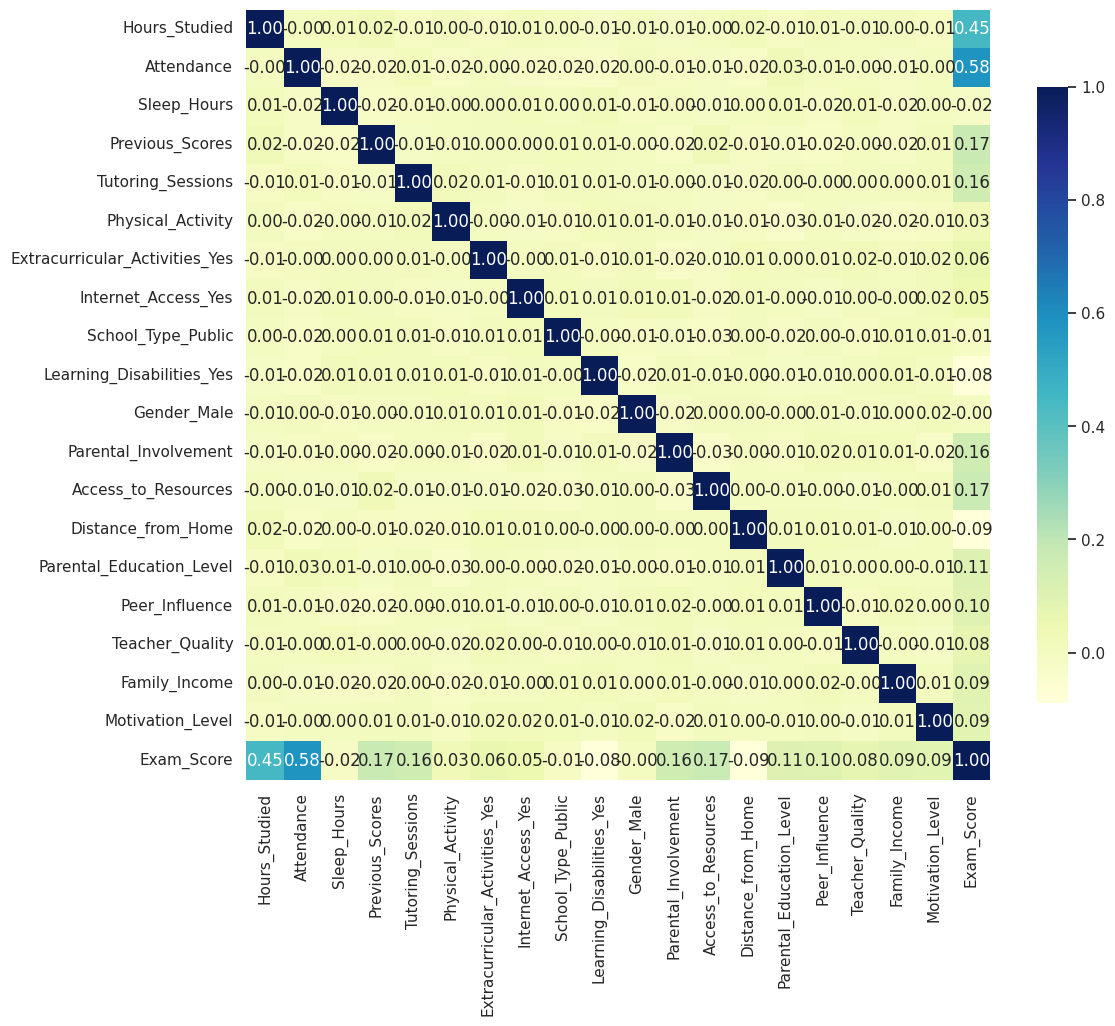

In [ ]:
# correlation heatmap
sns.set_theme()
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()



สร้าง Heatmap เพื่อแสดง Correlation Matrix ของ DataFrame ซึ่งเป็นเทคนิคที่มีประโยชน์อย่างมากในการ:

*  ระบุความสัมพันธ์: ดูอย่างรวดเร็วว่า features ใดมีความสัมพันธ์กันอย่างมาก (ทางบวกหรือทางลบ)
*เลือก features: ช่วยระบุ features ที่ซ้ำซ้อน หรือ features ที่อาจมีประโยชน์ในการทำนายตัวแปรเป้าหมาย
* ตรวจสอบ Multicollinearity: ระบุปัญหา Multicollinearity ซึ่ง features มีความสัมพันธ์กันสูง ซึ่งอาจส่งผลต่อเสถียรภาพ

In [ ]:
df.drop(df[df["Exam_Score"]>100].index, inplace=True)
df[df["Exam_Score"]>100]

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male,Parental_Involvement,Access_to_Resources,Distance_from_Home,Parental_Education_Level,Peer_Influence,Teacher_Quality,Family_Income,Motivation_Level,Exam_Score


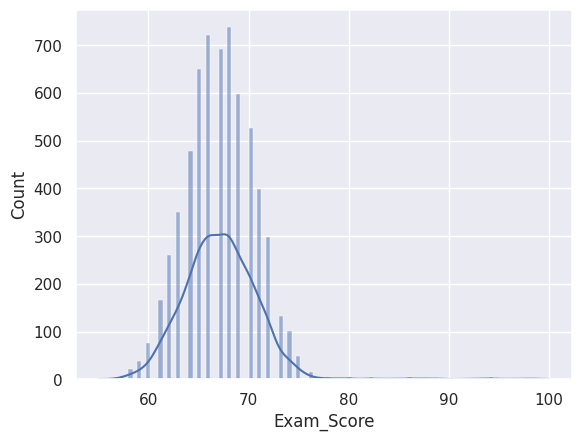

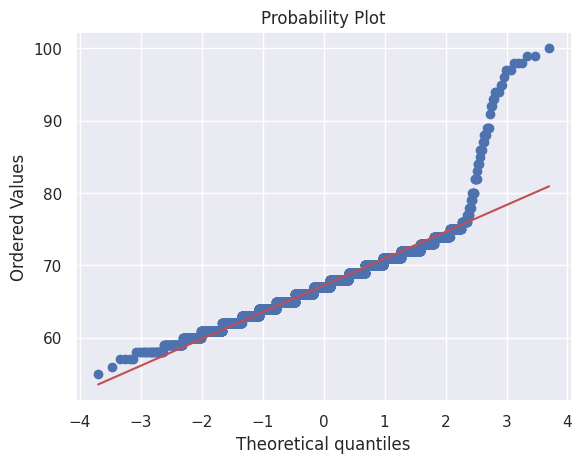

In [ ]:
from scipy import stats
var = "Exam_Score"
sns.histplot(df[var], kde=True)
fig = plt.figure()
res = stats.probplot(df[var], plot=plt)
plt.show()

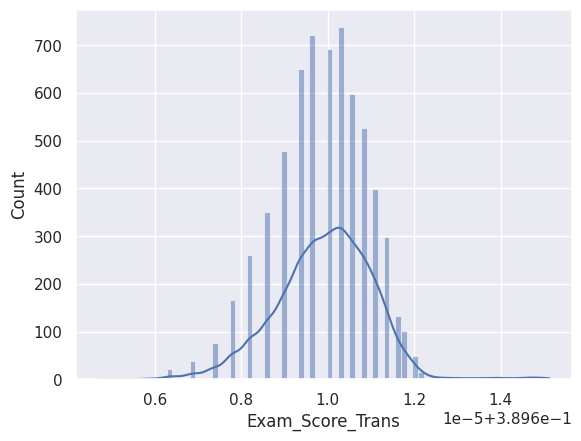

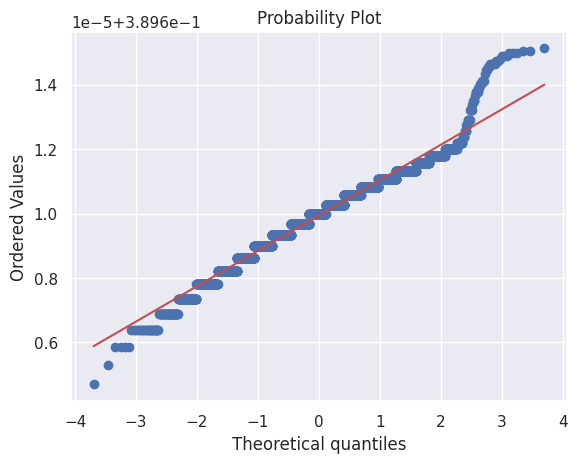

In [ ]:
df["Exam_Score_Trans"], lambda_value = stats.boxcox(df[var])
sns.histplot(df["Exam_Score_Trans"], kde=True)
fig = plt.figure()
res = stats.probplot(df["Exam_Score_Trans"], plot=plt)
plt.show()

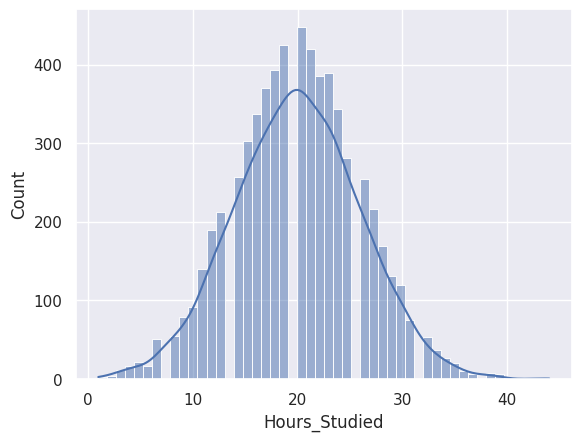

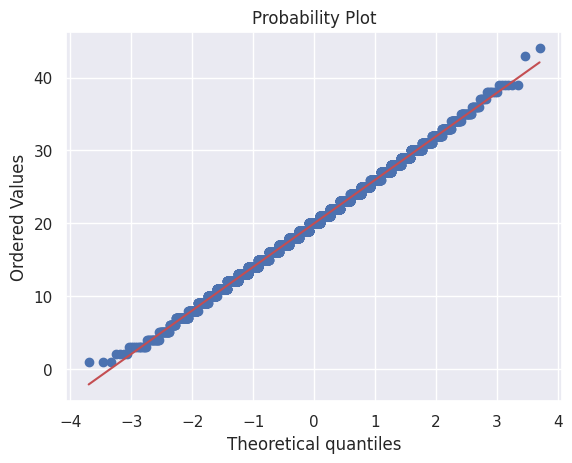

In [ ]:
# check for normality of "Hours_Studied"
var = "Hours_Studied"
sns.histplot(df[var], kde=True)
fig = plt.figure()
res = stats.probplot(df[var], plot=plt)
plt.show()

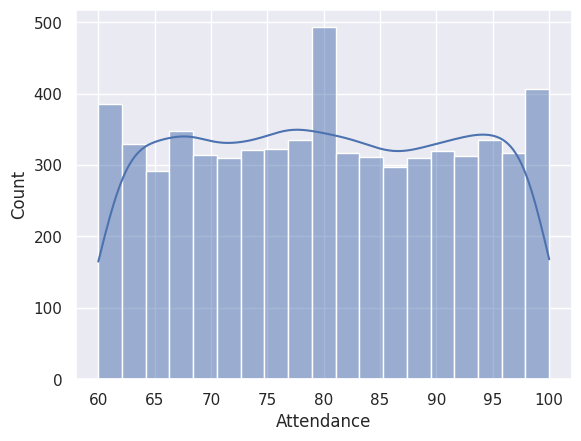

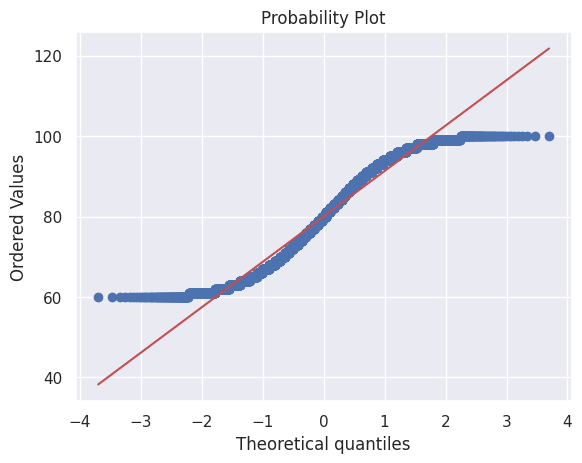

In [ ]:
# check for normality of "Attendance"
var = "Attendance"
sns.histplot(df[var], kde=True)
fig = plt.figure()
res = stats.probplot(df[var], plot=plt)
plt.show()

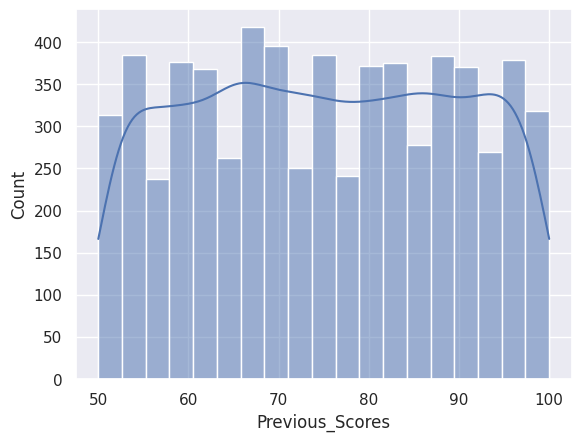

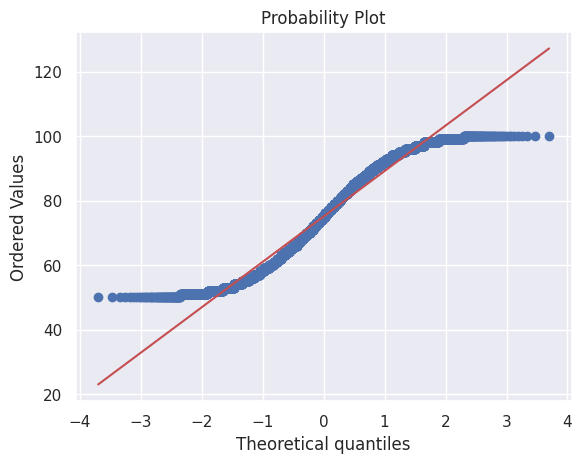

In [ ]:
# check for normality of "Previous_Scores"
var = "Previous_Scores"
sns.histplot(df[var], kde=True)
fig = plt.figure()
res = stats.probplot(df[var], plot=plt)
plt.show()

In [ ]:
scaler = StandardScaler()
df["Attendance_Scaled"] = scaler.fit_transform(df[["Attendance"]])
df["Previous_Scores_Scaled"] = scaler.fit_transform(df[["Previous_Scores"]])
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,...,Distance_from_Home,Parental_Education_Level,Peer_Influence,Teacher_Quality,Family_Income,Motivation_Level,Exam_Score,Exam_Score_Trans,Attendance_Scaled,Previous_Scores_Scaled
0,23,84,7,73,0,3,False,True,True,False,...,0,0,1,1,0,0,67,0.389610,0.344803,-0.143302
1,19,64,8,59,2,4,False,True,True,False,...,1,1,-1,1,1,0,61,0.389608,-1.387019,-1.115616
2,24,98,7,91,2,4,True,True,True,False,...,0,2,0,1,1,1,74,0.389612,1.557079,1.106816
3,29,89,8,98,1,4,True,True,True,False,...,1,0,-1,1,1,1,71,0.389611,0.777759,1.592974
4,19,92,6,65,3,4,True,True,True,False,...,0,1,0,2,1,1,70,0.389611,1.037532,-0.698910


โค้ดส่วนนี้ทำ Feature Scaling แบบ Standardization กับคอลัมน์ "Attendance" และ "Previous_Scores" เพื่อเตรียมข้อมูลให้พร้อมสำหรับการสร้าง Machine Learning model ซึ่งจะช่วยให้ model มีประสิทธิภาพมากขึ้น

In [ ]:
x = df.drop(["Exam_Score", "Exam_Score_Trans"], axis=1)
y = df[["Exam_Score_Trans"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)



*  "Exam_Score" เป็นตัวแปรเป้าหมายดั้งเดิมที่เราต้องการทำนาย แต่เราใช้ "Exam_Score_Trans" ซึ่งเป็นตัวแปรที่ถูกแปลงแล้วแทน ดังนั้นจึงต้อง drop "Exam_Score" ออก
*   Exam_Score_Trans" เป็นตัวแปรเป้าหมายที่เราต้องการทำนาย ดังนั้นจึงต้อง drop ออกจาก features (x) เพื่อป้องกัน data leakage (การที่ข้อมูลจากชุดทดสอบรั่วไหลไปยังชุดฝึกสอน)



In [ ]:
plm = make_pipeline(PolynomialFeatures(), LinearRegression())
score = cross_val_score(plm, x_train, y_train, cv=10)
print(score.mean(), score.std())

0.8540358409301831 0.05242761155241737


โมเดลมีค่า accuracy เฉลี่ยจากการทำ Cross-Validation 10 folds เท่ากับ 0.85
ส่วนเบี่ยงเบนมาตรฐานของ accuracy เท่ากับ 0.05 ซึ่งถือว่าต่ำ หมายความว่าโมเดลมีความเสถียร

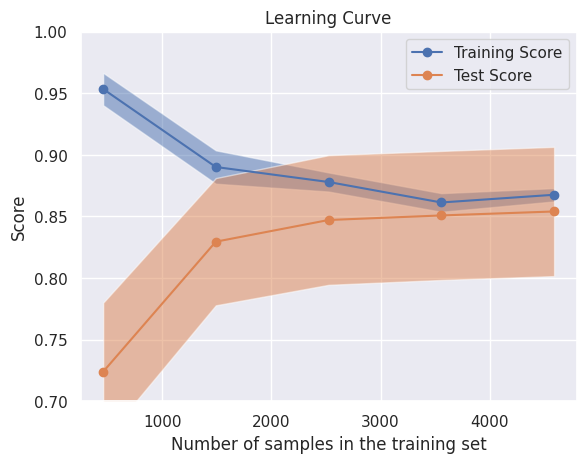

In [ ]:
plot_learning_curve(plm, "Learning Curve", x_train, y_train, ylim=(0.7, 1), cv=10)


กราฟนี้แสดงว่าโมเดลเรียนรู้ได้ดีเมื่อมีข้อมูลมากขึ้น โดยคะแนนของ Training และ Test ใกล้เคียงกัน ซึ่งหมายถึงโมเดลมีความสมดุลระหว่าง Bias และ Variance

 คะแนน Test Score สูงสุดอยู่ที่ประมาณ 0.85 ซึ่งอาจบ่งชี้ว่ายังมีโอกาสปรับปรุงโมเดลเพื่อให้มีความแม่นยำมากขึ้น เช่น การเพิ่มข้อมูลหรือปรับพารามิเตอร์ของโมเดล

In [ ]:
param_name = "polynomialfeatures__degree"
param_range = [1,2,3]
param_grid = {param_name: param_range}
grid_search = GridSearchCV(plm, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(x_train, y_train)
best_param = grid_search.best_params_[param_name]
best_estimator =  make_pipeline(PolynomialFeatures(degree=best_param), LinearRegression())
print(f"Optimal degree is {best_param}  ")
print(f" R2 score is {grid_search.best_score_}")

Optimal degree is 2  
 R2 score is 0.8523723826478307


Grid Search และ Cross-Validation เพื่อหาค่า degree ที่ดีที่สุดสำหรับโมเดล Polynomial Regression (plm) ซึ่งช่วยให้เราได้โมเดลที่มีประสิทธิภาพในการทำนายสูงสุด.

โดยการทดสอบค่า degree ที่แตกต่างกัน และประเมินประสิทธิภาพด้วย Cross-Validation ทำให้เราสามารถเลือกค่า degree ที่เหมาะสมที่สุดสำหรับข้อมูลของเรา และสร้างโมเดลที่ดีที่สุด.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your independent variables are in a DataFrame called 'X'
X = x_train.select_dtypes(include=np.number) # Select only numerical columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF data
print(vif_data)

                  feature       VIF
0           Hours_Studied  1.000846
1              Attendance       inf
2             Sleep_Hours  1.000941
3         Previous_Scores       inf
4       Tutoring_Sessions  1.000432
5       Physical_Activity  1.000709
6       Attendance_Scaled       inf
7  Previous_Scores_Scaled       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



ตัวแปร Attendance, Previous_Scores, Attendance_Scaled, และ Previous_Scores_Scaled มี multicollinearity

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score

# Create and evaluate the Ridge pipeline
ridge_pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Ridge())
scores = cross_val_score(ridge_pipeline, x_train, y_train, cv=5, scoring="r2")

# Print the results
print(f"Ridge R-squared: {scores.mean():.4f} (± {scores.std():.4f})")

Ridge R-squared: 0.8524 (± 0.0330)


Ridge regression ทำงานโดยการเพิ่ม penalty term เข้าไปในฟังก์ชัน cost ของ linear regression ซึ่ง penalty term นี้จะขึ้นอยู่กับขนาดของค่าสัมประสิทธิ์ (coefficients) ของตัวแปรต่างๆ ยิ่งค่าสัมประสิทธิ์มีขนาดใหญ่ penalty term ก็จะยิ่งมีขนาดใหญ่ ทำให้โมเดลพยายามลดขนาดของค่าสัมประสิทธิ์ลง ส่งผลให้เกิดการลด overfitting และทำให้โมเดลมีความยืดหยุ่นมากขึ้น

Predict and Evaluate

In [ ]:
best_estimator.fit(x_train, y_train)
y_hat = best_estimator.predict(x_test)

# inverse box-cox transformation for interpretive results
y_hat_inverted = (y_hat * lambda_value + 1) ** (1 / lambda_value)

y_hat, y_hat_inverted

(array([[0.38960847],
        [0.38961123],
        [0.38961025],
        ...,
        [0.3896105 ],
        [0.38961039],
        [0.38961102]]),
 array([[62.63375583],
        [71.5909141 ],
        [67.89939871],
        ...,
        [68.76494756],
        [68.38777376],
        [70.72420292]]))

โมเดลทำนายว่านักเรียนคนนี้จะได้คะแนนสอบประมาณ 68.76 คะแนน (หลังจากแปลงกลับจาก Box-Cox) โดยค่า 0.38961050 เป็นค่าที่ใช้ในการคำนวณภายในโมเดลเท่านั้น

In [ ]:
# evaluate using R2
score = cross_val_score(best_estimator, x_test, y_test, cv=10)
print(score.mean())

0.8734676551340849


โมเดล best_estimator สามารถอธิบายความแปรปรวนของคะแนนสอบ (Exam_Score) ได้ประมาณ 87.35% โดยพิจารณาจากผลการประเมินโดยใช้ Cross-Validation ซึ่งเป็นค่าที่ค่อนข้างสูง บ่งชี้ว่าโมเดลมีประสิทธิภาพในการทำนายคะแนนสอบได้ค่อนข้างดี

<ipython-input-70-c95a992aa8df>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




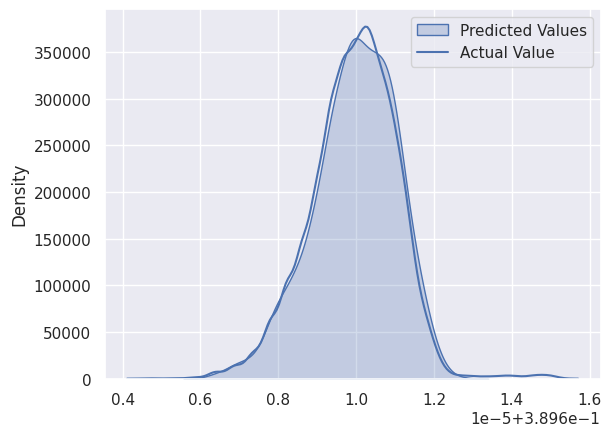

In [ ]:
# evaluate using kde plot
ax = sns.kdeplot((y_hat), color="b", label="Predicted Values", shade=True)
sns.kdeplot((y), color="r", label="Actual Value", ax=ax)
ax.legend()
plt.show()

โมเดลของเรามีความหน้าเชื่อถือเนื่องมีลักษณะกราฟคล้ายกัน